In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np.random.seed(42)
%matplotlib inline

In [14]:
# Load Data
data = pd.read_csv('FuelConsumption.csv')
data.head()
features = data[['ENGINESIZE','FUELCONSUMPTION_CITY']]
target = data[['CO2EMISSIONS']]

In [15]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_f = scaler.fit_transform(features)
scaled_f = pd.DataFrame(scaled_f)
scaled_f.columns = features.columns
features = scaled_f

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target,
                                test_size=0.2, random_state=42)

# Modeling

In [17]:
from sklearn.svm import SVR
model = SVR(kernel='sigmoid')
model.fit(xtrain, ytrain.values.ravel())

SVR(kernel='sigmoid')

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
ypred = model.predict(xtest)

In [19]:
mean_squared_error(ytest, ypred), r2_score(ytest, ypred)

(2512.2847126691604, 0.3924261603364151)

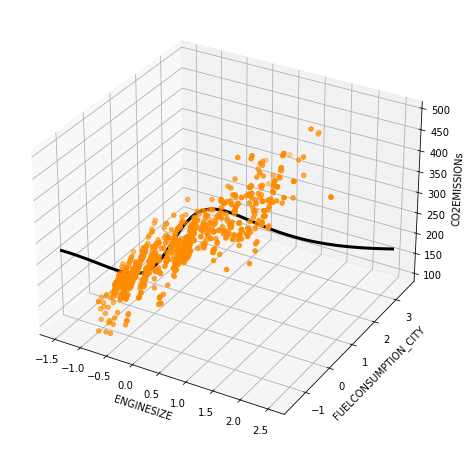

In [20]:
dummy_e = np.linspace(-1.5, 2.5, 300)
dummy_f = np.linspace(-1.5, 3.5, 300)
dummy_feature =np.c_[dummy_e, dummy_f]
plt.figure(figsize=(10,8))
axes = plt.axes(projection='3d')
axes.scatter3D(
    features.values[:,0], features.values[:,1], target, color='darkorange'
)
axes.plot3D(
    dummy_e, dummy_f, model.predict(dummy_feature).ravel(), color='black', linewidth=3
)
axes.set_xlabel('ENGINESIZE')
axes.set_ylabel('FUELCONSUMPTION_CITY')
axes.set_zlabel('CO2EMISSIONs')
plt.show()

# Hyperparameter Tuning

In [21]:
model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'sigmoid',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(
    model, param_distributions={
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
        'C': [1, 10, 21, 50, 70, 90, 120, 140, 160],
        'epsilon': [0.1, 0.3, 0.7, 1.0, 1.5, 1.7, 2.3, 2.7],
        'gamma': ['scale', 'auto'],
        'degree': [3, 4, 5, 6, 7, 8]
    }, cv=6, verbose=2
)
grid.fit(features, target.values.ravel())

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[CV] kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21, total=   0.1s
[CV] kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21 .............
[CV]  kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21, total=   0.1s
[CV] kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21 .............
[CV]  kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21, total=   0.0s
[CV] kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21 .............
[CV]  kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21, total=   0.0s
[CV] kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21 .............
[CV]  kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s



[CV] kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21 .............
[CV]  kernel=rbf, gamma=auto, epsilon=1.0, degree=4, C=21, total=   0.0s
[CV] kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50 ............
[CV]  kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50, total=   0.1s
[CV] kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50 ............
[CV]  kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50, total=   0.1s
[CV] kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50 ............
[CV]  kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50, total=   0.1s
[CV] kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50 ............
[CV]  kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50, total=   0.1s
[CV] kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50 ............
[CV]  kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50, total=   0.1s
[CV] kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50 ............
[CV]  kernel=poly, gamma=auto, epsilon=0.3, degree=5, C=50,

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.5min finished


RandomizedSearchCV(cv=6, estimator=SVR(kernel='sigmoid'),
                   param_distributions={'C': [1, 10, 21, 50, 70, 90, 120, 140,
                                              160],
                                        'degree': [3, 4, 5, 6, 7, 8],
                                        'epsilon': [0.1, 0.3, 0.7, 1.0, 1.5,
                                                    1.7, 2.3, 2.7],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   verbose=2)

In [23]:
grid.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.7, 'degree': 3, 'C': 160}

In [24]:
final_model = grid.best_estimator_

In [25]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,1067.0,-0.023349,0.615607,-1.043478,-0.608696,0.0,0.391304,2.173913
FUELCONSUMPTION_CITY,1067.0,0.131421,0.773821,-1.509434,-0.443396,0.0,0.556604,3.320755


In [26]:
dummy_e = np.linspace(-1.5, 2.5, 300)
dummy_f = np.linspace(-1.5, 3.5, 300)
dummy_feature =np.c_[dummy_e, dummy_f]

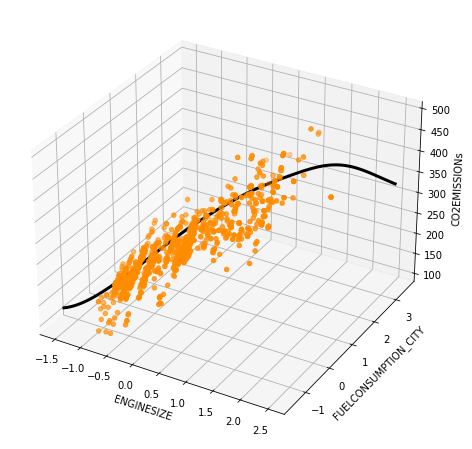

In [27]:
plt.figure(figsize=(10,8))
axes = plt.axes(projection='3d')
axes.scatter3D(
    features.values[:,0], features.values[:,1], target, color='darkorange'
)
axes.plot3D(
    dummy_e, dummy_f, final_model.predict(dummy_feature).ravel(), color='black', linewidth=3
)
axes.set_xlabel('ENGINESIZE')
axes.set_ylabel('FUELCONSUMPTION_CITY')
axes.set_zlabel('CO2EMISSIONs')
plt.show()